In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [2]:

data = pd.read_csv("D:\\Data\water_quality.csv")
data = data.fillna(data.mean())
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
means = data.mean()
stds = data.std()

In [5]:
stds

ph                    1.469956
Hardness             32.879761
Solids             8768.570828
Chloramines           1.583085
Sulfate              36.142612
Conductivity         80.824064
Organic_carbon        3.308162
Trihalomethanes      15.769881
Turbidity             0.780382
Potability            0.487849
dtype: float64

In [6]:
 import numpy as np
import pandas as pd



mean_pl = np.mean(data["Solids"])
std_deviation_pl = np.std(data["Solids"])
standardized_values_pl = (data["Solids"] - mean_pl) / std_deviation_pl

print("Standardized Values:")
print(standardized_values_pl)


Standardized Values:
0      -0.139471
1      -0.385987
2      -0.240047
3       0.000493
4      -0.460249
          ...   
3271    2.916188
3272   -0.534295
3273    1.270810
3274   -1.144058
3275   -0.525812
Name: Solids, Length: 3276, dtype: float64


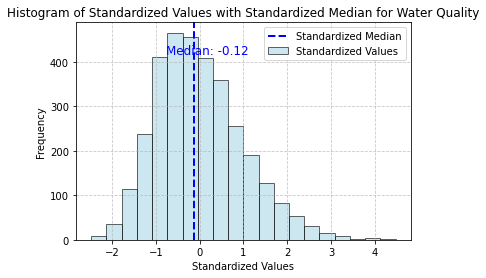

In [7]:

median_pl = np.median(data["Solids"])

standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(standardized_values_pl, bins=20, alpha=0.6, color='lightblue', label='Standardized Values', edgecolor='black')

plt.axvline(standardized_median_pl, color='blue', linestyle='dashed', linewidth=2, label='Standardized Median')

plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Values with Standardized Median for Water Quality')

plt.legend()
plt.text(plt.xlim()[0] + 2.05, plt.ylim()[1] * 0.9, f'Median: {(standardized_median_pl):.2f}', color='blue', ha='left', va='top', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [8]:
# Calculate the median
median_pl = np.median(data["Solids"])

standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl

left_mask = standardized_values_pl <= standardized_median_pl
left_selected_values = data["Solids"][left_mask]

right_mask = standardized_values_pl > standardized_median_pl
right_selected_values = data["Solids"][right_mask]

# Print the selected values
print("Left Selected Values:")
print(left_selected_values)
print("Right Selected Values:")
print(right_selected_values)
print(len(right_selected_values))

Left Selected Values:
0       20791.31898
1       18630.05786
2       19909.54173
4       17978.98634
7       13672.09176
           ...     
3267    15921.41202
3268    17246.92035
3272    17329.80216
3274    11983.86938
3275    17404.17706
Name: Solids, Length: 1638, dtype: float64
Right Selected Values:
3       22018.41744
5       28748.68774
6       28749.71654
9       25484.50849
10      32452.61441
           ...     
3265    27701.79405
3269    37188.82602
3270    26138.78019
3271    47580.99160
3273    33155.57822
Name: Solids, Length: 1638, dtype: float64
1638


In [9]:

left_diff = np.abs(left_selected_values - median_pl)
right_diff = np.abs(right_selected_values - median_pl)

left_sorted = left_selected_values.reset_index(drop=True)[np.argsort(left_diff)]
right_sorted = right_selected_values.reset_index(drop=True)[np.argsort(right_diff)]


num_values = len(left_selected_values)
print(len(left_selected_values))
print(len(right_selected_values))
left_75_percent = left_sorted[:int(0.85 * num_values)]
right_75_percent = right_sorted[:int(0.85 * num_values)]

print("Left 85%:")
print(left_75_percent)
print("Right 85%:")
print(right_75_percent)
print(len(right_75_percent))
print(len(left_75_percent))

selected_left_rows = data.loc[left_75_percent.index]
selected_right_rows = data.loc[right_75_percent.index]

# Print the selected rows
print("Selected Left Rows:")
print(selected_left_rows)
print("Selected Right Rows:")
print(selected_right_rows)

1638
1638
Left 85%:
853    20922.15446
280    20920.25156
498    20919.05143
889    20911.90467
849    20894.40049
          ...     
54     10909.19459
285    10897.15029
220    10859.55375
827    10836.96978
812    10835.20116
Name: Solids, Length: 1392, dtype: float64
Right 85%:
670     20933.51275
82      20944.62081
32      20965.47831
1584    20967.84061
1303    20976.79178
           ...     
143     35344.65805
108     35370.73552
729     35381.67076
1210    35418.73504
1006    35434.28006
Name: Solids, Length: 1392, dtype: float64
1392
1392
Selected Left Rows:
            ph    Hardness        Solids  Chloramines     Sulfate  \
853   5.039374  142.860598  40829.353170     7.271543  333.775777   
280   9.794559  129.870958  20682.731740     9.390843  291.980083   
498   6.427512  178.326555  25993.711410     7.294554  329.695223   
889   5.923441  167.658602  25951.554040     6.296103  350.381981   
849   6.739158  156.482759  30950.681100     6.543090  363.179623   
..        

In [10]:
combined_dataset = pd.concat([selected_left_rows, selected_right_rows], axis=0)

# Print the combined dataset
print("Combined Dataset:")
print(combined_dataset)

Combined Dataset:
            ph    Hardness       Solids  Chloramines     Sulfate  \
853   5.039374  142.860598  40829.35317     7.271543  333.775777   
280   9.794559  129.870958  20682.73174     9.390843  291.980083   
498   6.427512  178.326555  25993.71141     7.294554  329.695223   
889   5.923441  167.658602  25951.55404     6.296103  350.381981   
849   6.739158  156.482759  30950.68110     6.543090  363.179623   
...        ...         ...          ...          ...         ...   
143   7.861178  204.274241  25145.02412     7.923315  338.213803   
108   6.098157  189.995846  27776.90105     6.443098  347.930400   
729   6.350290  190.383738  14905.39385     5.537830  333.775777   
1210  7.949965  186.789151  15171.01233     7.833275  333.775777   
1006  7.230845  177.574803  17864.68939     5.818229  343.593332   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
853     386.803057       16.823773        52.297113   4.957420           0  
280     427

In [11]:
combined_dataset_without_variety = combined_dataset.drop(columns=["Potability"])

print("Combined Dataset without 'variety' column:")
print(combined_dataset_without_variety)

Combined Dataset without 'variety' column:
            ph    Hardness       Solids  Chloramines     Sulfate  \
853   5.039374  142.860598  40829.35317     7.271543  333.775777   
280   9.794559  129.870958  20682.73174     9.390843  291.980083   
498   6.427512  178.326555  25993.71141     7.294554  329.695223   
889   5.923441  167.658602  25951.55404     6.296103  350.381981   
849   6.739158  156.482759  30950.68110     6.543090  363.179623   
...        ...         ...          ...          ...         ...   
143   7.861178  204.274241  25145.02412     7.923315  338.213803   
108   6.098157  189.995846  27776.90105     6.443098  347.930400   
729   6.350290  190.383738  14905.39385     5.537830  333.775777   
1210  7.949965  186.789151  15171.01233     7.833275  333.775777   
1006  7.230845  177.574803  17864.68939     5.818229  343.593332   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
853     386.803057       16.823773        52.297113   4.957420  
280     42

In [12]:
combined_dataset_without_variety=combined_dataset_without_variety.drop(columns=["Turbidity"])


In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 2

kmeans = KMeans(n_clusters=k, random_state=0)

kmeans.fit(combined_dataset_without_variety)

clusters = kmeans.predict(combined_dataset_without_variety)

silhouette_avg = silhouette_score(combined_dataset_without_variety, clusters)

print("Silhouette Score for {} clusters: {:.2f}".format(k, silhouette_avg))
print("Cluster Labels:", clusters)


Silhouette Score for 2 clusters: 0.57
Cluster Labels: [1 0 1 ... 0 0 0]


In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

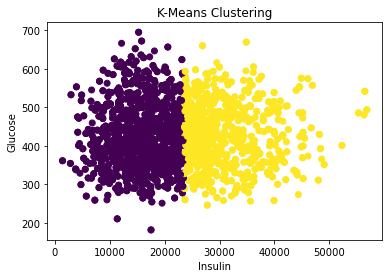

In [15]:

feature1 = combined_dataset_without_variety['Solids']
feature2 = combined_dataset_without_variety['Conductivity']

plt.scatter(feature1, feature2, c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()


In [ ]:
#K means

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.read_csv("D:\\Data\\water_quality.csv")
data = data.fillna(data.mean())
# Drop the "Outcome" column
data = data.drop(columns=["Potability"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Define a range of k values for K-Means
k_values = range(2, 11)

# Initialize variables to store outlier counts and silhouette scores
outlier_counts = []
silhouette_scores = []

# Perform K-Means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Detect and count outliers using the Mahalanobis distance method
    cluster_centers = kmeans.cluster_centers_
    mahalanobis_distances = np.sqrt(np.sum(((scaled_data - cluster_centers[cluster_labels]) ** 2), axis=1))
    threshold = np.percentile(mahalanobis_distances, 85)  # Define a threshold for outliers (e.g., 95th percentile)
    outliers = np.where(mahalanobis_distances > threshold)[0]
    outlier_counts.append(len(outliers))
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Print the number of outliers deleted for each k
for k, outliers_deleted in zip(k_values, outlier_counts):
    print(f'Number of outliers deleted for k={k}: {outliers_deleted}')

# Print the silhouette scores for each k
for k, silhouette_avg in zip(k_values, silhouette_scores):
    print(f'Silhouette score for k={k}: {silhouette_avg}')


Number of outliers deleted for k=2: 492
Number of outliers deleted for k=3: 492
Number of outliers deleted for k=4: 492
Number of outliers deleted for k=5: 492
Number of outliers deleted for k=6: 492
Number of outliers deleted for k=7: 492
Number of outliers deleted for k=8: 492
Number of outliers deleted for k=9: 492
Number of outliers deleted for k=10: 492
Silhouette score for k=2: 0.08046176948533378
Silhouette score for k=3: 0.0764827076244073
Silhouette score for k=4: 0.07237266888759171
Silhouette score for k=5: 0.07387267295517957
Silhouette score for k=6: 0.07356765112481274
Silhouette score for k=7: 0.07584368980684436
Silhouette score for k=8: 0.07401251255152985
Silhouette score for k=9: 0.07728670144205974
Silhouette score for k=10: 0.07696205124746759
